In [1]:
# creating Markov chain
States <- c("Sun", "Cloud", "Rain")
TransitionMatrix <- matrix(c(0.6,0.2,0.2,
                             0.2,0.4,0.4,
                             0.4,0.3,0.3), nrow=3, byrow = T, dimnames = list(States,States))

In [2]:
TransitionMatrix

,Sun,Cloud,Rain
Sun,0.6,0.2,0.2
Cloud,0.2,0.4,0.4
Rain,0.4,0.3,0.3


In [3]:
# install.packages("markovchain")

In [4]:
library(markovchain)

Package:  markovchain
Version:  0.6.9.14
Date:     2019-01-20
BugReport: http://github.com/spedygiorgio/markovchain/issues



In [5]:
Weather <- new("markovchain", states=States, byrow=T, transitionMatrix= TransitionMatrix, name="Forecast")

In [6]:
Weather

Forecast 
 A  3 - dimensional discrete Markov Chain defined by the following states: 
 Sun, Cloud, Rain 
 The transition matrix  (by rows)  is defined as follows: 
      Sun Cloud Rain
Sun   0.6   0.2  0.2
Cloud 0.2   0.4  0.4
Rain  0.4   0.3  0.3


In [7]:
#install.packages("diagram")
library(diagram)
library(zoo)
library(lattice)

Loading required package: shape

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



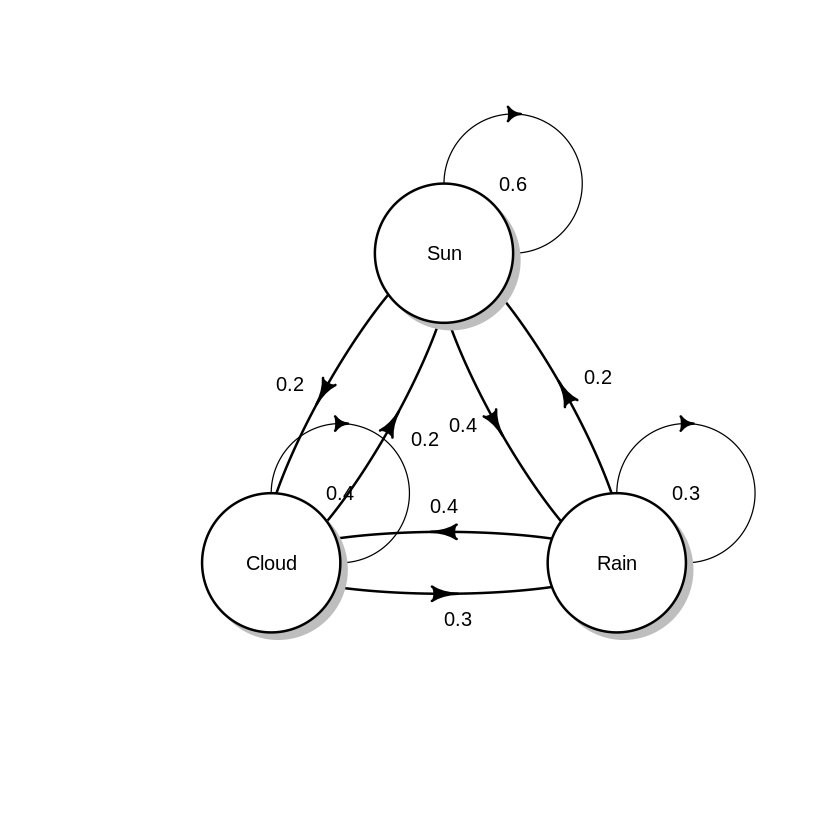

In [8]:
#plotting the MC

plotmat(TransitionMatrix, pos=c(1,2))

In [9]:
Weather^2

Forecast^2 
 A  3 - dimensional discrete Markov Chain defined by the following states: 
 Sun, Cloud, Rain 
 The transition matrix  (by rows)  is defined as follows: 
       Sun Cloud Rain
Sun   0.48  0.26 0.26
Cloud 0.36  0.32 0.32
Rain  0.42  0.29 0.29


In [10]:
Weather^3

Forecast^3 
 A  3 - dimensional discrete Markov Chain defined by the following states: 
 Sun, Cloud, Rain 
 The transition matrix  (by rows)  is defined as follows: 
        Sun Cloud  Rain
Sun   0.444 0.278 0.278
Cloud 0.408 0.296 0.296
Rain  0.426 0.287 0.287


In [11]:
steadyStates(Weather)

Sun,Cloud,Rain
0.4285714,0.2857143,0.2857143


In [12]:
Weather^30

Forecast^30 
 A  3 - dimensional discrete Markov Chain defined by the following states: 
 Sun, Cloud, Rain 
 The transition matrix  (by rows)  is defined as follows: 
            Sun     Cloud      Rain
Sun   0.4285714 0.2857143 0.2857143
Cloud 0.4285714 0.2857143 0.2857143
Rain  0.4285714 0.2857143 0.2857143


In [21]:
Markov <- function (N=100, initial.value=1, P) {
    X <- numeric(N)
    X[1] <- initial.value + 1 # States 0:5; subscripts 1:6
    n <- nrow(P)
    for (i in 2:N){
        X[i] <- sample(1:n, size=1, prob=P[X[i-1], ])}
    X - 1
}

plotmarkov <-
    function(n=1000, start=0, window=50, transition=TransitionMatrix, npanels=5){
    xc2 <- Markov(n, start, transition)
    mav0 <- rollmean(as.integer(xc2==0), window)
    mav1 <- rollmean(as.integer(xc2==0), window)
    npanel <- cut(1:length(mav0), breaks=seq(from=1, to=length(mav0),
    length=npanels+1), include.lowest=TRUE)
    df <- data.frame(av0=mav0, av1=mav1, x=1:length(mav0),
    gp=npanel)
    print(xyplot(av0+av1~x | gp, data=df, layout=c(1,npanels),
    type="l", par.strip.text=list(cex=0.65),
    scales=list(x=list(relation="free"))))
}

In [22]:
#simulation of 1000 steps
initialStep = c (1,0,0)
finalStep = initialStep * Weather^1000

#is it in a steady state?
all.equal(finalStep, steadyStates(Weather))

[1] TRUE

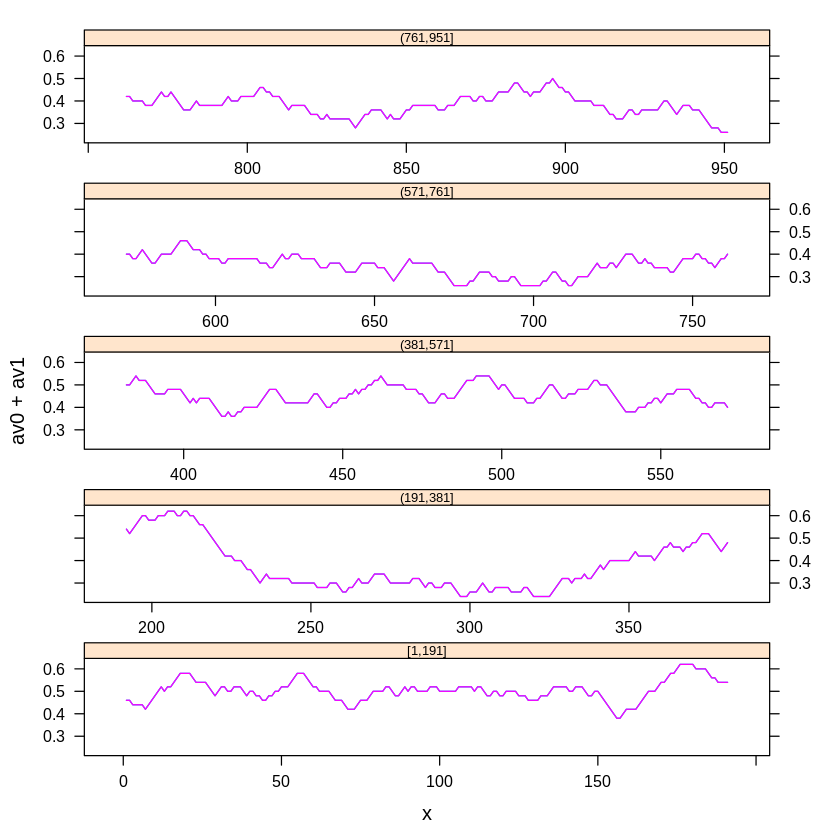

In [23]:
plotmarkov()

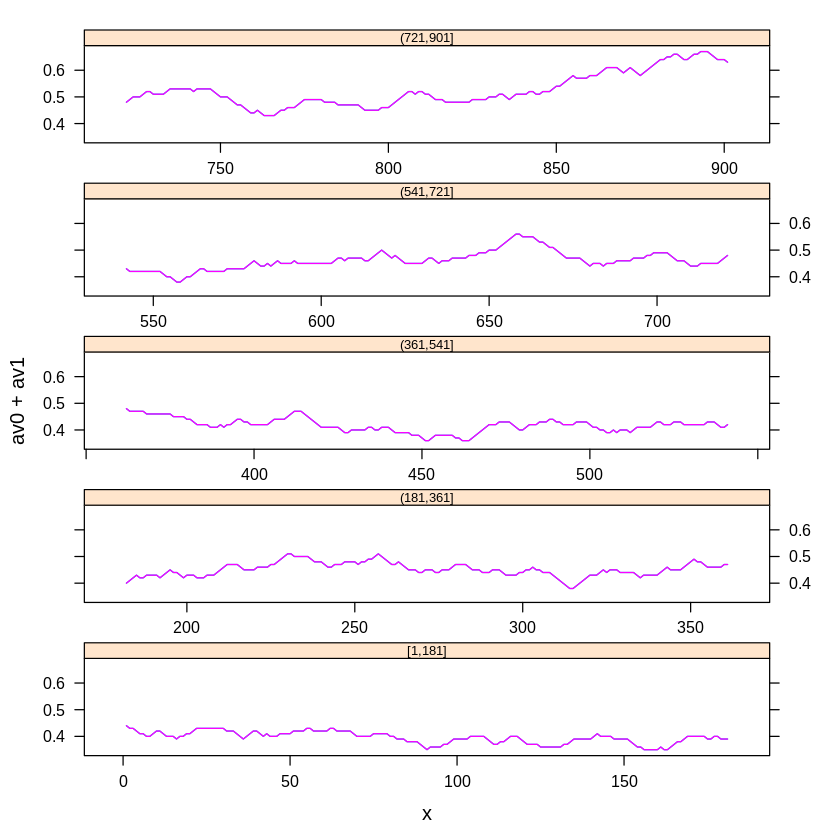

In [24]:
plotmarkov(window=100)


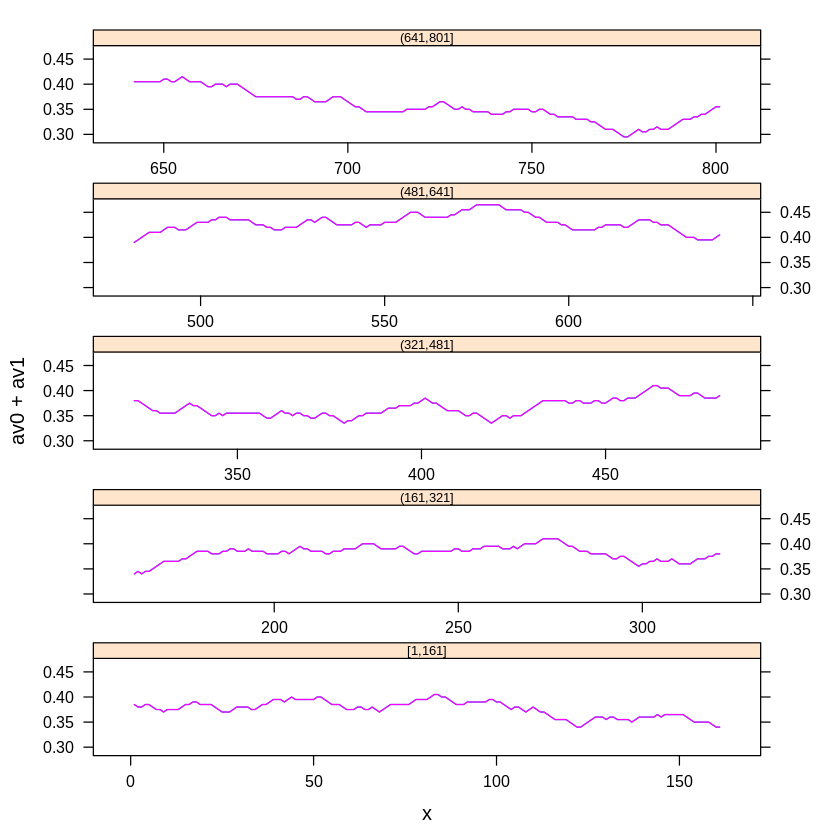

In [25]:
plotmarkov(window=200)

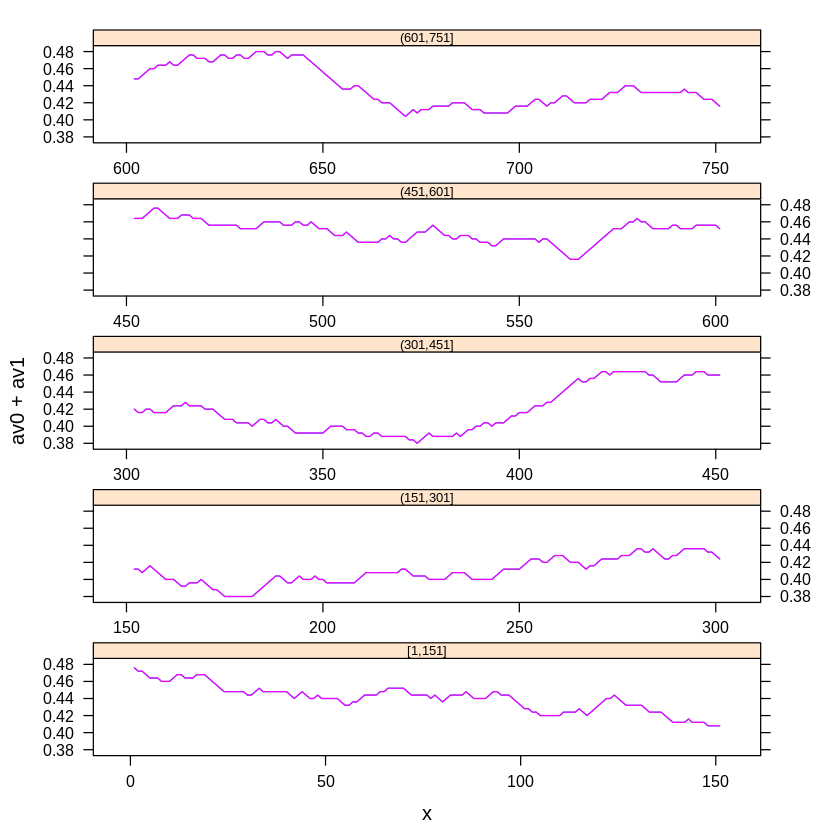

In [29]:
plotmarkov(window=250)

With increasing window size, the rolling mean stabilizes (when looking at graphs, take into consideration different y-scales). A decent approximation can be observed with a window size of 200-250.